In [ ]:
print("Hello")

Hello


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('traffic.csv')


In [ ]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df.shape

(48120, 4)

In [ ]:
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


<Axes: >

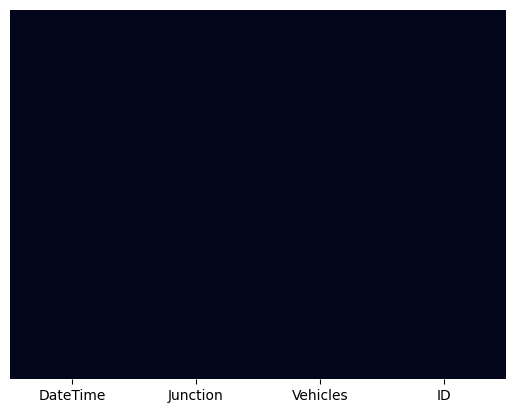

In [ ]:
# Heatmap to check how much it's having missing value

sns.heatmap(df.isnull(), yticklabels=False, cbar= False)

In [ ]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


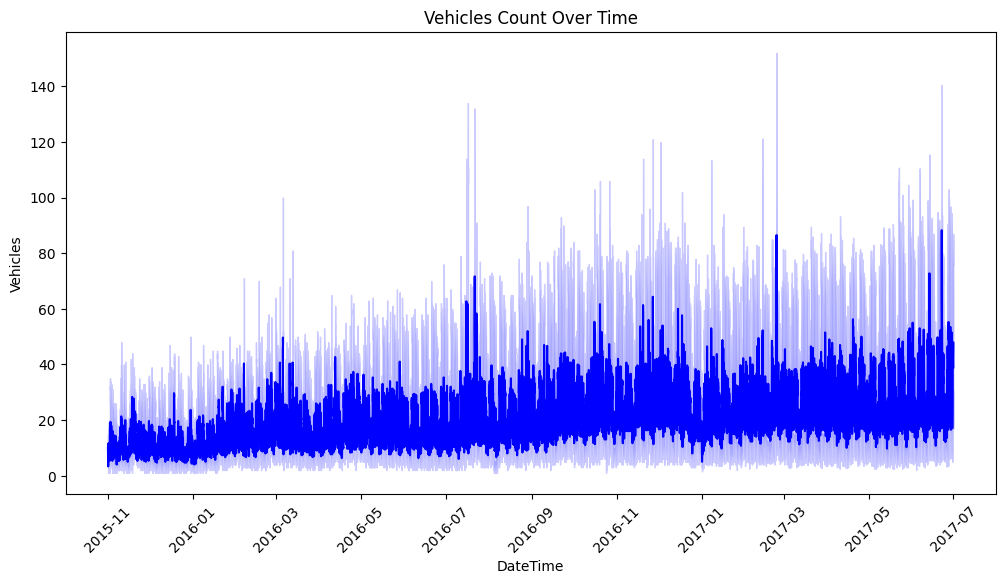

In [ ]:
# Time Series Plot (DateTime vs. Vehicles)
#To observe how the number of vehicles changes over time:
# Convert DateTime to datetime format if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plotting the number of vehicles over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Vehicles', data=df, color='b')
plt.title('Vehicles Count Over Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.show()


In [3]:
# Vehicle Count by Junction
# A bar plot can help you understand the total vehicle count at each junction:
# Aggregate vehicle count by Junction
vehicle_by_junction = df.groupby('Junction')['Vehicles'].sum().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Junction', y='Vehicles', data=vehicle_by_junction, palette='Set2')
plt.title('Total Vehicles by Junction')
plt.xlabel('Junction')
plt.ylabel('Total Vehicles')
plt.show()


NameError: name 'df' is not defined

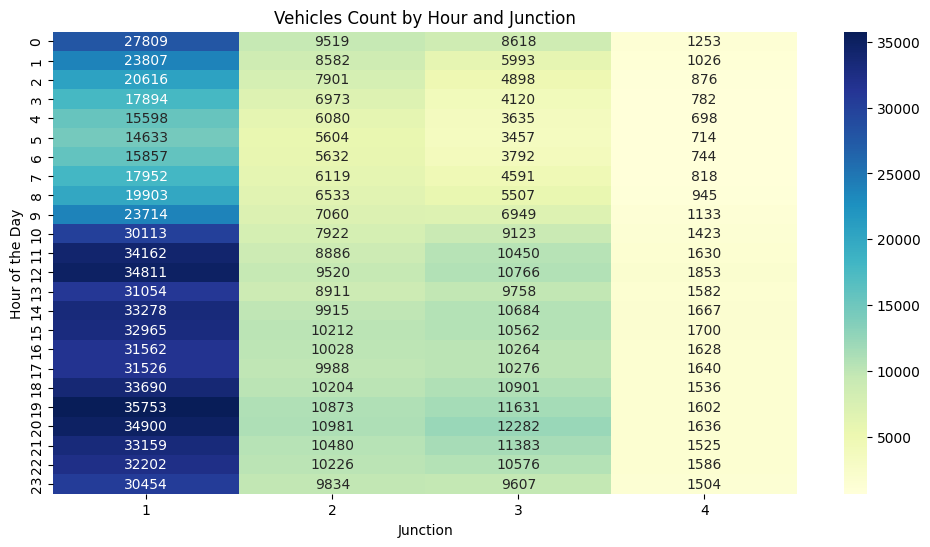

In [ ]:
# Heatmap of Vehicle Counts Across Time and Junction
# If you want to visualize how traffic varies by time of day and junction, a heatmap can be useful.
# Extracting hour from DateTime for time-of-day analysis
df['Hour'] = df['DateTime'].dt.hour

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Hour', columns='Junction', values='Vehicles', aggfunc='sum')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Vehicles Count by Hour and Junction')
plt.xlabel('Junction')
plt.ylabel('Hour of the Day')
plt.show()


<ipython-input-15-7fc60552b280>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Junction', y='Vehicles', data=df, palette='coolwarm')


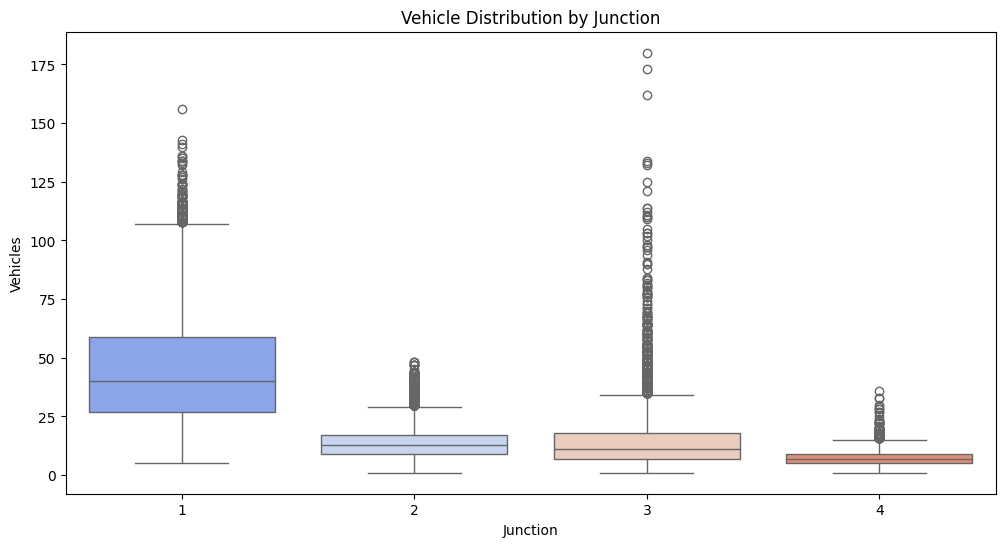

In [ ]:
# Boxplot for Vehicle Distribution by Junction
# Boxplots help visualize the distribution and outliers in the number of vehicles for each junction
# Boxplot for vehicles across different junctions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Junction', y='Vehicles', data=df, palette='coolwarm')
plt.title('Vehicle Distribution by Junction')
plt.xlabel('Junction')
plt.ylabel('Vehicles')
plt.show()


<ipython-input-16-ce930f44395f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Junction', data=df, palette='Pastel1')


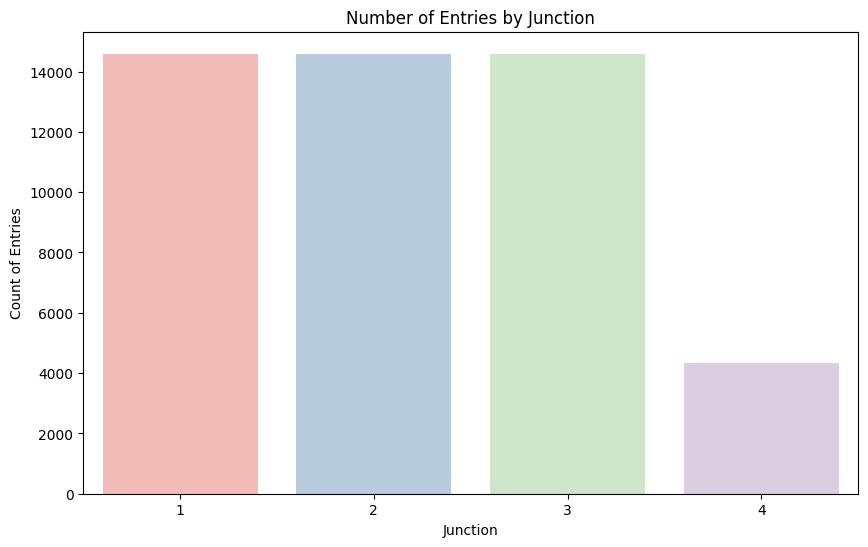

In [ ]:
# Count of Entries by Junction
# This will help you understand how many records exist for each junction.
# Countplot for the number of records per Junction
plt.figure(figsize=(10, 6))
sns.countplot(x='Junction', data=df, palette='Pastel1')
plt.title('Number of Entries by Junction')
plt.xlabel('Junction')
plt.ylabel('Count of Entries')
plt.show()


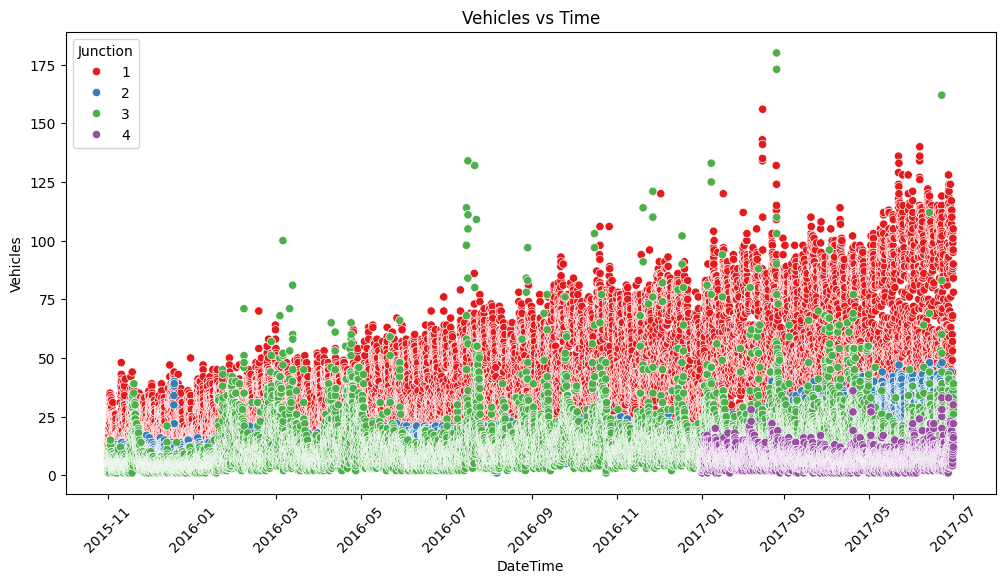

In [ ]:
#Scatter Plot (Vehicles vs. DateTime)
#To visualize how the number of vehicles correlates with the time of day, you can plot a scatter plot.
# Scatter plot of vehicles over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DateTime', y='Vehicles', data=df, hue='Junction', palette='Set1')
plt.title('Vehicles vs Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.show()


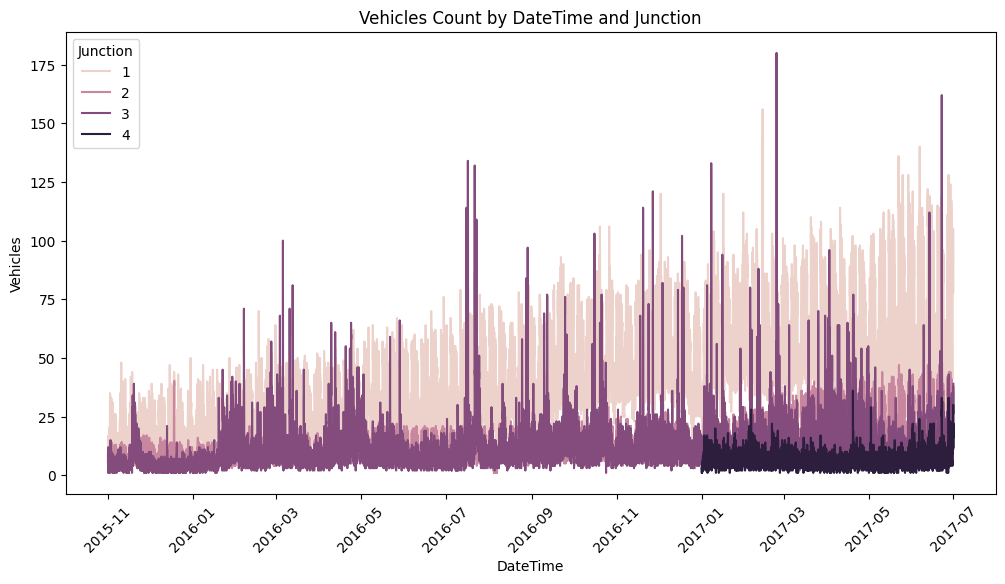

In [ ]:
 #Line Plot of Vehicles Count by DateTime for Each Junction
# If you're interested in understanding the vehicle count over time for each junction, you can use a line plot for each junction.
# Grouping by DateTime and Junction
df_grouped = df.groupby(['DateTime', 'Junction'])['Vehicles'].sum().reset_index()

# Lineplot for each junction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='DateTime', y='Vehicles', hue='Junction')
plt.title('Vehicles Count by DateTime and Junction')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.show()



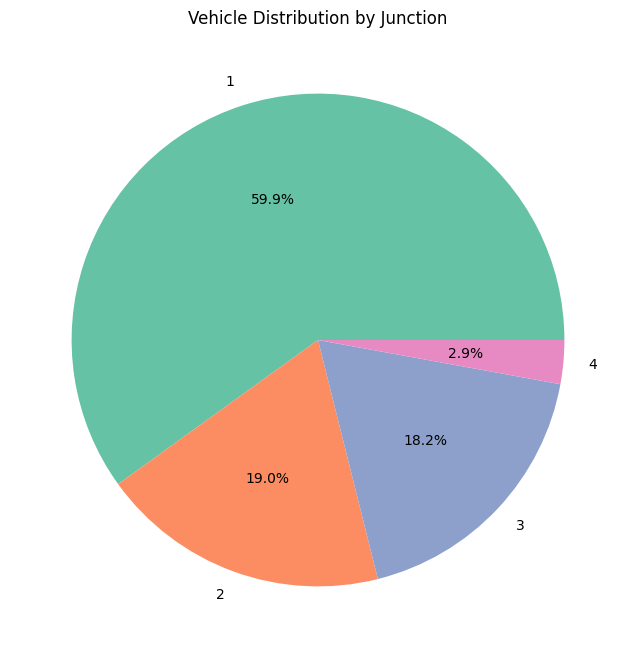

In [ ]:
# Pie Chart for Vehicle Distribution by Junction
#  A pie chart can give an overview of the proportion of vehicle counts at each junction.
# Pie chart for vehicle distribution by Junction
vehicle_distribution = df.groupby('Junction')['Vehicles'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
vehicle_distribution.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', len(vehicle_distribution)))
plt.title('Vehicle Distribution by Junction')
plt.ylabel('')
plt.show()


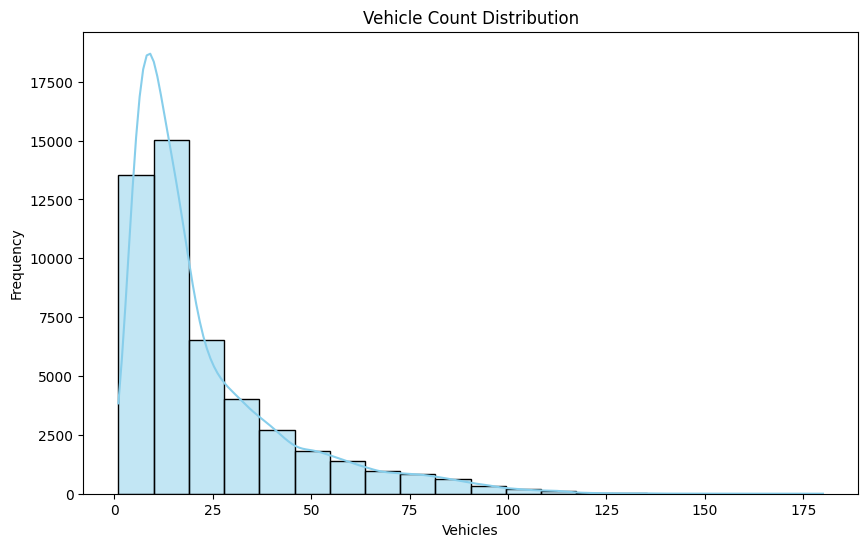

In [ ]:
# Histogram of Vehicle Counts
# A histogram can be useful to visualize the distribution of the number of vehicles at each junction.
# Histogram for vehicle count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicles'], bins=20, kde=True, color='skyblue')
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.show()


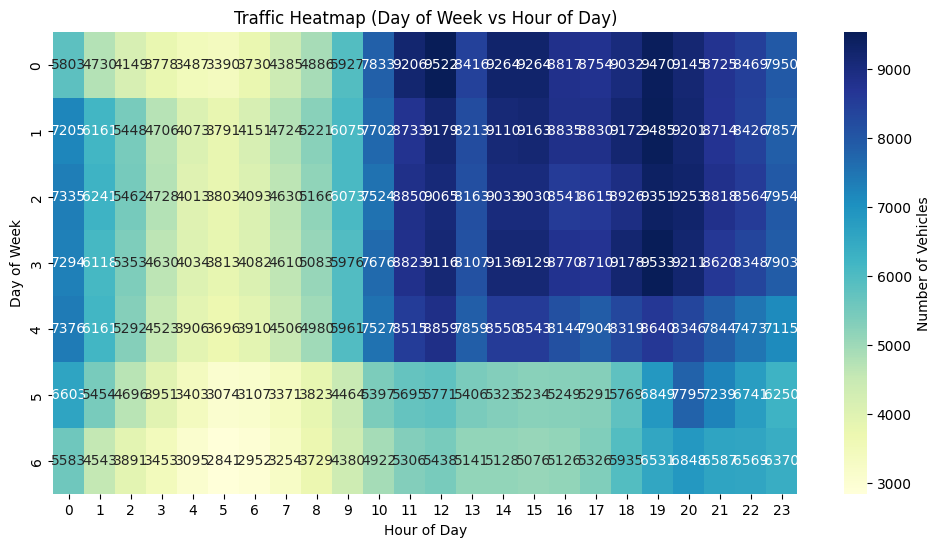

In [ ]:
#Time-Based Analysis with Heatmap
#A heatmap can show traffic congestion at different times of the day and days of the week. This will help identify peak traffic hours or days.
# Extract the hour of the day and day of the week
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Pivot table to get a matrix for heatmap
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Vehicles', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Number of Vehicles'})
plt.title('Traffic Heatmap (Day of Week vs Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


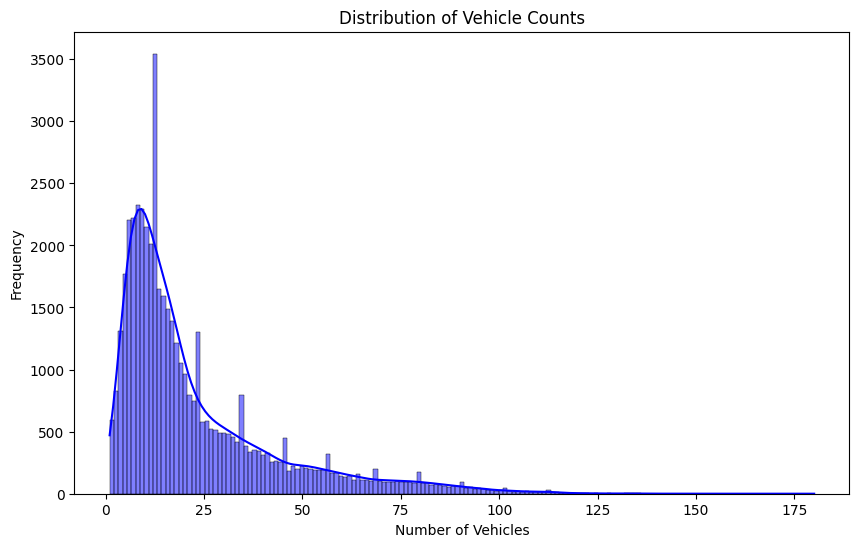

In [ ]:
#Distribution of Vehicle Counts
#Use a histogram to analyze how vehicle counts are distributed across your dataset.
# Plotting histogram for the distribution of Vehicles
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicles'], kde=True, color='blue')
plt.title('Distribution of Vehicle Counts')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

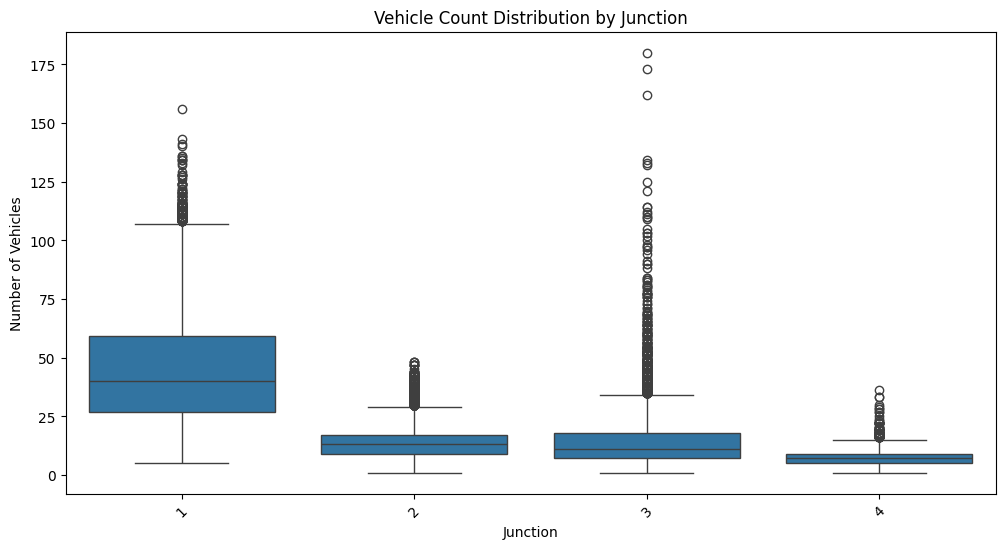

In [ ]:
#Boxplot for Vehicle Counts by Junction
#A boxplot allows you to analyze vehicle count variation across different junctions, which can show traffic behavior for each location.
# Boxplot to show vehicle distribution across different junctions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Junction', y='Vehicles', data=df)
plt.title('Vehicle Count Distribution by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

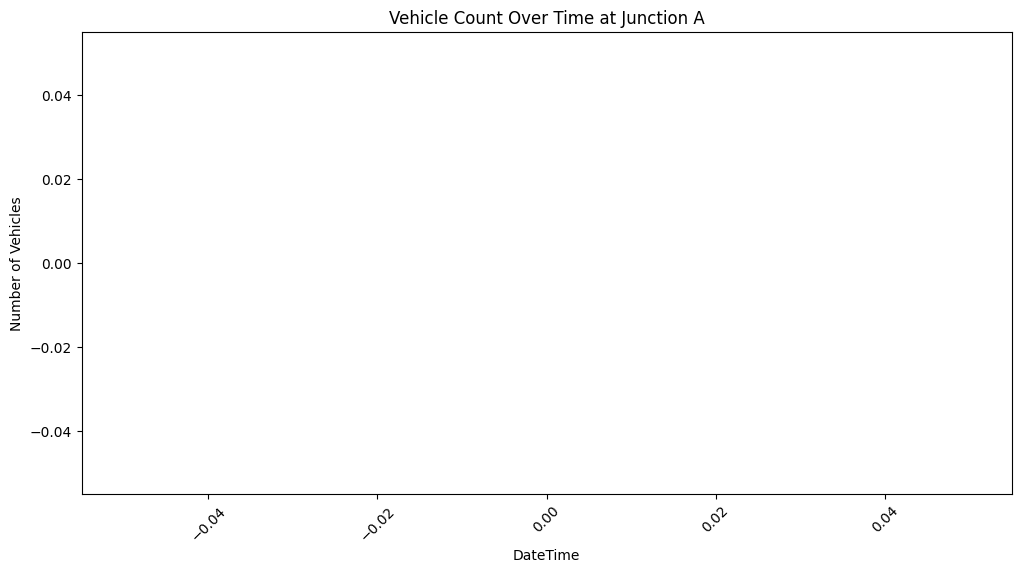

In [ ]:
# Time Series Plot for Vehicle Counts by Junction
#This time series plot allows you to see how traffic at each junction changes over time.
# Filter data for a particular junction, for example 'Junction A'
df_junction_a = df[df['Junction'] == 'Junction A']

# Plotting time series for vehicle counts at 'Junction A'
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Vehicles', data=df_junction_a, color='red')
plt.title('Vehicle Count Over Time at Junction A')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure 'DateTime' is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract relevant time features from 'DateTime'
df['Hour'] = df['DateTime'].dt.hour  # Extract hour of the day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['DateTime'].dt.month  # 1=January, 12=December


In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select relevant features and target variable
features = df[['Hour', 'DayOfWeek', 'Month']]
target = df['Vehicles']

# Normalize the features
features_scaled = scaler.fit_transform(features)

# Normalize the target variable (Vehicles)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)

# Initialize the model (e.g., MLP Regressor)
model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# change
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model = Sequential()

# Add layers (input layer and hidden layers)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 units, ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization

# Hidden layers
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.2))  # Dropout layer

model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.2))  # Dropout layer

# Output layer
model.add(Dense(1))  # Only one output node for regression (vehicle count)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0163 - mae: 0.0960 - val_loss: 0.0102 - val_mae: 0.0905
Epoch 2/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0134 - mae: 0.0885 - val_loss: 0.0112 - val_mae: 0.0947
Epoch 3/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0132 - mae: 0.0884 - val_loss: 0.0099 - val_mae: 0.0879
Epoch 4/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0133 - mae: 0.0887 - val_loss: 0.0106 - val_mae: 0.0914
Epoch 5/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0131 - mae: 0.0879 - val_loss: 0.0106 - val_mae: 0.0924
Epoch 6/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0131 - mae: 0.0881 - val_loss: 0.0106 - val_mae: 0.0914
Epoch 7/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0132 - mae: 0.0880 - val_loss: 0.0083 - val_mae: 0.0792
Epoch 8/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0134 - mae: 0.0890 - val_loss: 0.0096 - val_mae: 0.0861
Epoch 9/50
1203/1203 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error (MAE) on test data: {mae}")


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - mae: 0.0682
Mean Absolute Error (MAE) on test data: 0.08753125369548798


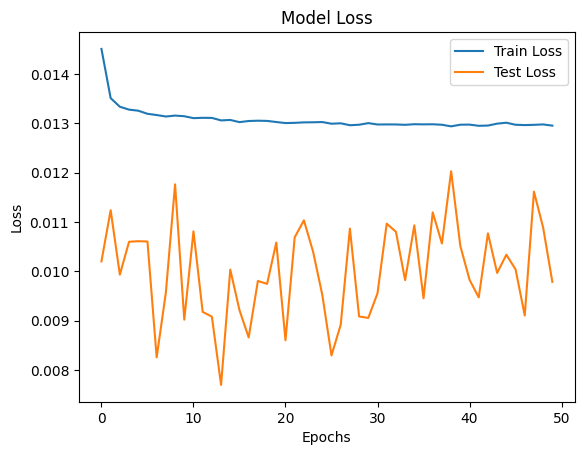

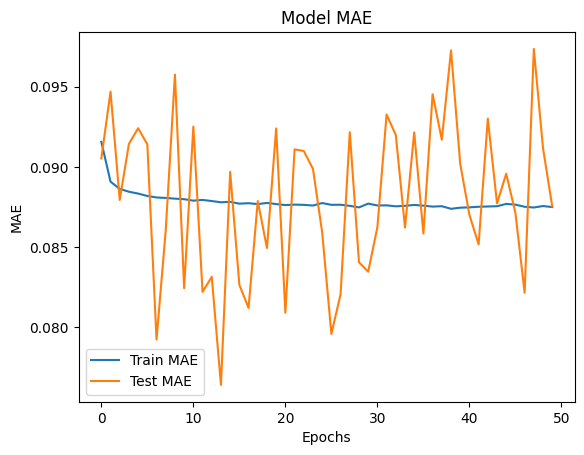

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation MAE (Mean Absolute Error)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse scaling to get the original vehicle count values
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Compare actual vs predicted values
import pandas as pd
predictions_df = pd.DataFrame({'Actual': y_test_original.flatten(), 'Predicted': predictions.flatten()})
print(predictions_df.head())


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Actual  Predicted
0    17.0  23.914085
1    12.0  21.827656
2    10.0  18.888248
3     7.0  17.665548
4     4.0  17.674620


 Real-Time Implementation (Optional)
For a real-time traffic management system, you could integrate this model with real-time traffic data (e.g., from cameras or sensors), and adjust traffic signals dynamically based on predicted vehicle counts.

This completes the basic flow of using deep learning for your intelligent traffic management system. You can iterate on this by trying different model architectures, improving data preprocessing, or adding real-time capabilities based on your project requirements.